# Hard Problem

Now we turn to a harder problem that does not have a one to one mapping between all the transitions and the terms in the ODEs.

We use a **S**usceptible, **L**atent, **I**nfective, **A**symptomatic and **R**emoved model.

In this model, **S**usceptible individuals may be infected and enter a **L**atent phase after which they are capable of onward transmission as members of the **I**nfective or **A**symptomatic classes. Those in the **A** class have infectivity reduced by a factor $\delta$ relative to the **I** class. These states are populated by the outflow of **L**atent individuals, where a fraction $p$ proceed to the **I**nfective group and the remainder instead become **A**symptomatic, both at a rate $\kappa$. All **A**symptomatics eventually become **R**emoved, whereas a fraction, $1-f$, of **I**nfectives go on to die, thus reducing the total living population, **N**.

The equations are as follows:

under mass action $\beta(N) \propto N$
$$\begin{aligned}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\beta S (I + \delta A) \\    
\frac{\mathrm{d}L}{\mathrm{d}t} &= \beta S (I + \delta A) - \kappa L \\  
\frac{\mathrm{d}I}{\mathrm{d}t} &= p \kappa L - \alpha I \\
\frac{\mathrm{d}A}{\mathrm{d}t} &= (1 - p) \kappa L - \eta A \\
\frac{\mathrm{d}R}{\mathrm{d}t} &= f \alpha I + \eta A \\
\frac{\mathrm{d}N}{\mathrm{d}t} &= -(1 - f) \alpha I.
\end{aligned}$$

where $N+D=N_0$, assuming we start when deaths are zero.

under standard incidence $\beta(N) = \text{const}$
$$\begin{aligned}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\beta S \frac{(I + \delta A)}{N} \\    
\frac{\mathrm{d}L}{\mathrm{d}t} &= \beta S \frac{(I + \delta A)}{N} - \kappa L \\  
\frac{\mathrm{d}I}{\mathrm{d}t} &= p \kappa L - \alpha I \\
\frac{\mathrm{d}A}{\mathrm{d}t} &= (1 - p) \kappa L - \eta A \\
\frac{\mathrm{d}R}{\mathrm{d}t} &= f \alpha I + \eta A \\
\frac{\mathrm{d}N}{\mathrm{d}t} &= -(1 - f) \alpha I.
\end{aligned}$$

We see the difficulty for finding the transitions:

The outflow of state **L**, $\kappa L$, is composed of two transitions, one to **I** and the other to **A** but the ode of **L** only reflects the total flow going out of the state.

Also confusing things is the fact that the total number of living individuals **N** is not a distinct category, rather $N=S+L+I+A+R$ and thus it doesn't make sense to think of any of our groups flowing into it since they are a subset of it. We must instead identify how the leave the system, in this case **D**ead, so we replace the last equation with:

$$\begin{aligned}
\frac{\mathrm{d}D}{\mathrm{d}t} &= (1 - f) \alpha I.
\end{aligned}$$
and substitute N from the above equations

The combination $S+L+I+A+R+D$ is constant, so all the flows on the LHS must add to zero and we have a closed system.

TODO: Is this a necessary condition? If so, we could add a quick error message if sum!=0

digraph SLIARD_Model {  
labelloc = "t"; label = "Original transitions"; rankdir=LR; size="8"
node \[shape = circle\]; S -\> L \[ label = "-Sβ(I + δA)/N" \]; L -\> I
\[ label = "κLp" \]; L -\> A \[ label = "κL(1-p)" \]; I -\> R \[ label =
"αIf" \]; I -\> D \[ label = "αI(1-f)" \]; A -\> R \[ label = "ηA" \];

}

In [1]:
from pygom import SimulateOde, Transition, TransitionType

stateList = ['S', 'L', 'I', 'A', 'R', 'D']
paramList = ['beta', 'p', 'kappa', 'alpha', 'f', 'delta', 'epsilon']
odeList = [Transition(origin='S', equation='- beta*S*(I + delta*A)', transition_type=TransitionType.ODE), 
           Transition(origin='L', equation='beta*S*(I + delta*A) - kappa*L', transition_type=TransitionType.ODE),
           Transition(origin='I', equation='p*kappa*L - alpha*I', transition_type=TransitionType.ODE),
           Transition(origin='A', equation='(1 - p)*kappa*L - epsilon*A', transition_type=TransitionType.ODE),
           Transition(origin='R', equation='f*alpha*I + epsilon*A', transition_type=TransitionType.ODE), 
           Transition(origin='D', equation='(1 - f)*alpha*I', transition_type=TransitionType.ODE)]
model = SimulateOde(stateList, paramList, ode=odeList)
#model.get_transition_matrix()
model.get_ode_eqn()

Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])

In [2]:
model = model.get_unrolled_obj()
model.get_transition_matrix()

Matrix([
[0, A*S*beta*delta/N + I*S*beta/N,         0,                    0,         0,                    0],
[0,                             0, L*kappa*p, -L*kappa*p + L*kappa,         0,                    0],
[0,                             0,         0,                    0, I*alpha*f, -I*alpha*f + I*alpha],
[0,                             0,         0,                    0, A*epsilon,                    0],
[0,                             0,         0,                    0,         0,                    0],
[0,                             0,         0,                    0,         0,                    0]])

In [3]:
model.get_ode_eqn()

Matrix([
[         -A*S*beta*delta/N - I*S*beta/N],
[A*S*beta*delta/N + I*S*beta/N - L*kappa],
[                   -I*alpha + L*kappa*p],
[       -A*epsilon - L*kappa*p + L*kappa],
[                  A*epsilon + I*alpha*f],
[                   -I*alpha*f + I*alpha]])

In [ ]:
# Lets see what happens with standard

#stateList = ['S', 'L', 'I', 'A', 'R', 'N']
#paramList = ['beta', 'p', 'kappa', 'alpha', 'f', 'delta', 'epsilon']
#odeList = [Transition(origin='S', equation='-beta*S/N*(I + delta*A)', transition_type=TransitionType.ODE), 
#           Transition(origin='L', equation='beta*S/N*(I + delta*A) - kappa*L', transition_type=TransitionType.ODE),
#           Transition(origin='I', equation='p*kappa*L - alpha*I', transition_type=TransitionType.ODE),
#           Transition(origin='A', equation='(1 - p)*kappa*L - epsilon*A', transition_type=TransitionType.ODE),
#           Transition(origin='R', equation='f*alpha*I + epsilon*A', transition_type=TransitionType.ODE), 
#           Transition(origin='N', equation='-(1 - f)*alpha*I', transition_type=TransitionType.ODE)]
#model = SimulateOde(stateList, paramList, ode=odeList)
#model.get_transition_matrix()

stateList = ['S', 'L', 'I', 'A', 'R', 'D']
paramList = ['beta', 'p', 'kappa', 'alpha', 'f', 'delta', 'epsilon', 'tot']
odeList = [Transition(origin='S', equation='- (beta*S/(tot-D))*(I + delta*A)', transition_type=TransitionType.ODE), 
           Transition(origin='L', equation='(beta*S/(tot-D))*(I + delta*A) - kappa*L', transition_type=TransitionType.ODE),
           Transition(origin='I', equation='p*kappa*L - alpha*I', transition_type=TransitionType.ODE),
           Transition(origin='A', equation='(1 - p)*kappa*L - epsilon*A', transition_type=TransitionType.ODE),
           Transition(origin='R', equation='f*alpha*I + epsilon*A', transition_type=TransitionType.ODE), 
           Transition(origin='D', equation='(1 - f)*alpha*I', transition_type=TransitionType.ODE)]
model = SimulateOde(stateList, paramList, ode=odeList)
model.get_transition_matrix()



In [ ]:
model = model.get_unrolled_obj()

In [ ]:
model.get_transition_matrix()

In [ ]:
model.get_ode_eqn()

After unrolling the ODEs, we can extract the following transition graph.

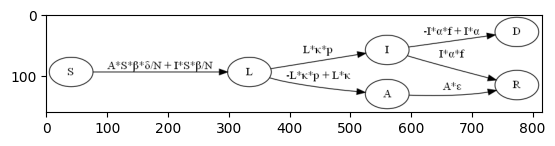

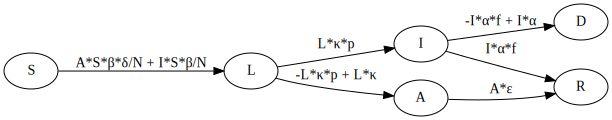

In [4]:
model.get_transition_graph()

There is a slight difference in the arrangement of terms, but this matches what we were expecting our transition graph to look like. We can reaffirm this by algebraically comparing the two ODE systms.

In [5]:
print(sum(ode.get_ode_eqn() - ode2.get_ode_eqn()).simplify())

0
